In [ ]:
# Bezier Curves
# Imports
import numpy as np
import matplotlib.pyplot as plt


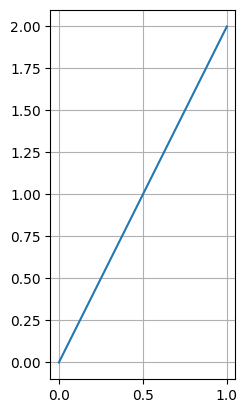

In [83]:
# Linear Bezier curve
P1 = np.array([0,0])
P2 = np.array([1,2])


# Linear Bezier function
def bezier1(P0, P1, dt = 0.001):
    t = np.array([np.arange(0,1+dt,dt)]).T
    curve = P0 + t * (P1 - P0)
    return curve.T

x, y = bezier1(P1,P2)

plt.plot(x,y)
plt.grid()
plt.gca().set_aspect('equal')

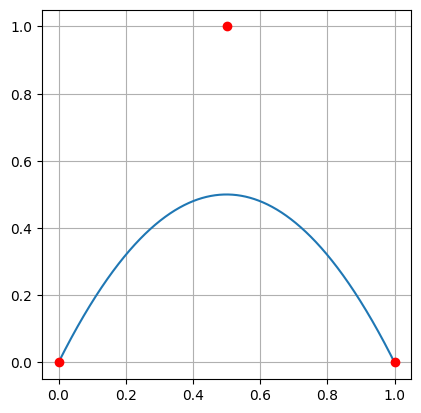

In [87]:
# quadratic bezier functions
P1 = np.array([0,0])
P2 = np.array([1/2,1])
P3 = np.array([1,0])

def bezier2(P0,P1,P2, dt = 0.001):
    t = np.array([np.arange(0,1+dt,dt)]).T
    curve = P1 + (1-t)**2 * (P0-P1) + t**2 *(P2-P1)
    return curve.T

x, y = bezier2(P1, P2, P3)

P = np.array([P1,P2,P3])
xv, yv = P.T 

# xw, yw = np.arange(0,1,0.01), -2*(xw - 0.5)**2 + 1/2
plt.plot(x,y)
# plt.plot(xw,yw)
plt.scatter(xv, yv, color = 'r', zorder = 2)
plt.grid()
plt.gca().set_aspect('equal')

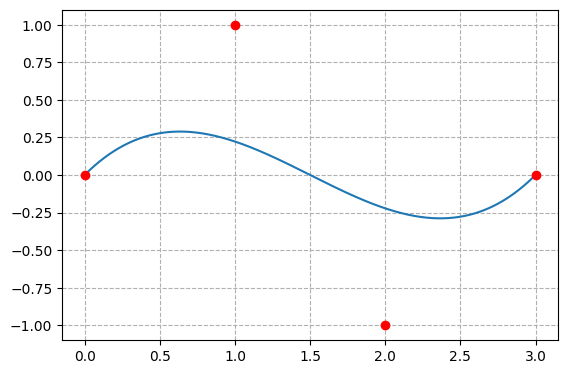

In [89]:
# Cubic Bezier Curve
P1 = np.array([0,0])
P2 = np.array([1,1])
P3 = np.array([2,-1])
P4 = np.array([3,0])

def bezier3(P0,P1,P2, P3, dt = 0.001):
    t = np.array([np.arange(0,1+dt,dt)]).T
    curve = (1-t)**3 * P0 + 3*(1-t)**2 * t * P1 + 3*(1-t) * t**2 * P2 + t**3 * P3
    return curve.T
x, y = bezier3(P1, P2, P3, P4)

P = np.array([P1, P2, P3, P4])
xv, yv = P.T  # Transpose to separate x and y
plt.plot(x,y)
plt.scatter(xv, yv, color = 'r', zorder = 2)

plt.gca().set_aspect('equal')
plt.grid(True, zorder = 0, linestyle = '--')

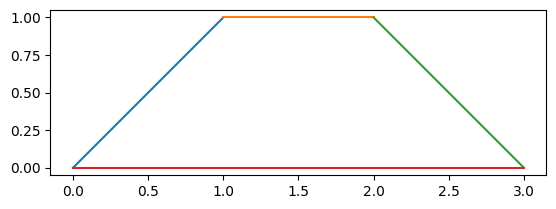

In [94]:
P1 = np.array([0,0])
P2 = np.array([1,1])
P3 = np.array([2,1])
P4 = np.array([3,0])
points = np.array([P1, P2, P3, P4, P1])  # Include P1 at the end to close the shape
for i in range(len(points) - 1):
    curve = bezier1(points[i], points[i + 1])
    plt.plot(curve[0], curve[1])
plt.gca().set_aspect('equal')
plt.show()


In [ ]:
cube = np.array([0,0,-1],[0,1,-1],[1,1,-1],[1,0,-1],
                [0,0,-2],[0,1,-2],[1,1,-2],[1,0,-2])

# get the projection of the cube on z = 0 
 
dist = 3 # distance to the z plane
observer_pos = np.array(0,0,dist)

# get the vectors from the  observer to the cube vertices
# find the points intersection of the vector (originating from the observer) to z=0
# graph the edges of the cube using bezier1


In [ ]:

# plt.plot(circle[0], circle[1])
# plt.gca().set_aspect('equal')

array([[1.        , 0.99999013, 0.99996052, ..., 0.99991118, 0.99996052,
        0.99999013],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.50314157, 0.50628302, ..., 0.49057578, 0.49371698,
        0.49685843]], shape=(3, 1000))

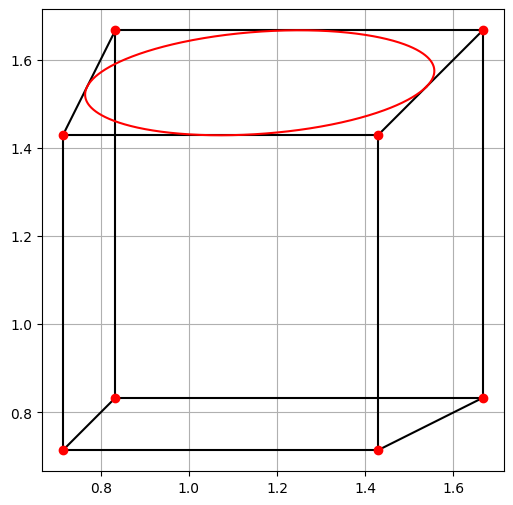

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define prism vertices
height = 1
width = 1
depth = 1
origin = np.array([1,1,0])
dist_z = -1
cube = origin + np.array([
    [0, 0, dist_z], 
    [0, height, dist_z], 
    [width, height, dist_z], 
    [width, 0, dist_z],
    [0, 0, dist_z - depth], 
    [0, height, dist_z - depth], 
    [width, height, dist_z - depth], 
    [width, 0, dist_z - depth]
    ]
)


# A flat circle
# Observer position
dist = 5
observer_pos = np.array([0, 0, dist])

# Function to find intersection of a line with z=0 plane
def project_to_plane(observer, point):
    direction = point - observer
    t = -observer[2] / direction[2]  # Solve for t when z=0
    return observer + t * direction

# Project all cube vertices
projected = np.array([project_to_plane(observer_pos, v) for v in cube])

# Define edges of the cube (pairs of vertex indices)
edges = [(0, 1), (1, 2), (2, 3), (3, 0),  # Front face
         (4, 5), (5, 6), (6, 7), (7, 4),  # Back face
         (0, 4), (1, 5), (2, 6), (3, 7)]  # Connecting edges


t = np.arange(0,1,0.001)
r = 0.5
depth = 1
center = np.array([1.5, depth ,-1.5])
circle = center[:, None] + np.array([r * np.cos(2 * np.pi * t), np.ones_like(t)*depth, r * np.sin(2 * np.pi * t)])
projected_circle =  np.array([project_to_plane(observer_pos, v) for v in circle.T])

# Linear Bezier function
def bezier1(P0, P1, dt=0.001):
    t = np.array([np.arange(0, 1 + dt, dt)]).T
    curve = P0 + t * (P1 - P0)
    return curve.T

# Plot projected edges
plt.figure(figsize=(6, 6))
for edge in edges:
    P0, P1 = projected[edge[0]], projected[edge[1]]
    curve = bezier1(P0, P1)
    plt.plot(curve[0], curve[1], 'k')

plt.plot(projected_circle[:,0], projected_circle[:,1], color = 'r')
plt.scatter(projected[:, 0], projected[:, 1], color='r', zorder=2)
plt.grid(True, zorder=0)
plt.gca().set_aspect('equal')
plt.show()
